# Laboratório 1
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: Usando scikit-learn para Aprendizado de Máquina!
Para começarmos, faremos um exemplo de como serão os futuros exercícios de Aprendizado de Máquina usando a biblioteca scikit-learn. Não se preocupe em entender tudo que está acontecendo agora, vamos abordar essas técnicas durante os próximos laboratórios, esse é apenas um exemplo do processo!

## Preparando o ambiente Python
Antes de mais nada, precisamos configurar o nosso Google Colab, para que tenha todas as ferramentas necessárias disponíveis para o uso. Nada nos impede de realizar isso apenas quando precisarmos, mas é uma boa prática já deixar na mão tudo que sabemos que vamos usar!
As bibliotecas que iremos usar hoje já vêm instaladas no ambiente por padrão, mas se estiver usando outra ferramenta ou executando em um computador pessoal, lembre-se de instalar. Normalmente rodar "pip install" e o nome da biblioteca resolve!
Com tudo instalado, vamos importar o que precisamos. Note que algumas bibliotecas possuem um alias, "as", que é apenas um apelido para a biblioteca, facilitando quando chamarmos alguma função dela sem precisar escrever o nome completo. Essas são as nomenclaturas padrão que irá encontrar na grande maioria dos exemplos.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Também não precisamos importar toda a biblioteca do scikit-learn, mas podemos selecionar apenas o que queremos usar. No caso desse exemplo, importaremos o dataset iris, um divisor de dados em treino e teste, um escalador, um modelo de classificação KNN e algumas métricas. Não se preocupe com esses nomes agora!

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Preparando os dados
Com o ambiente configurado, precisamos dos dados para alimentar nosso modelo de AM. O Iris é uma das bases de dados mais comuns nos exercícios de AM, sendo composta de informações sobre três espécies de flores.
Iremos instalar esse dataset e realizar algumas etapas de pré-processamento nos dados. O pré-processamento é a etapa de preparo dos dados que antecede a alimentação do modelo. Iremos explorar bem melhor esse conceito no próximo Laboratório.

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Ensinando e testando o modelo
Agora que temos os dados divididos em treino, que serão "ensinados" ao modelo, e teste, que usaremos para ver o quão correto o modelo é, e em X, dados de entrada, e y, de saída. Podemos fornecer esses dados a um modelo de AM.

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Visualizando os resultados
Que bom! Nosso modelo funcionou e a acurácia foi igual a 1, isso significa que a taxa de acerto do que o modelo previu e as respostas reais foi de 100%!
Mas, o que isso significa na prática? Podemos usar gráficos para enxergarmos isso melhor!

Resultados do modelo:


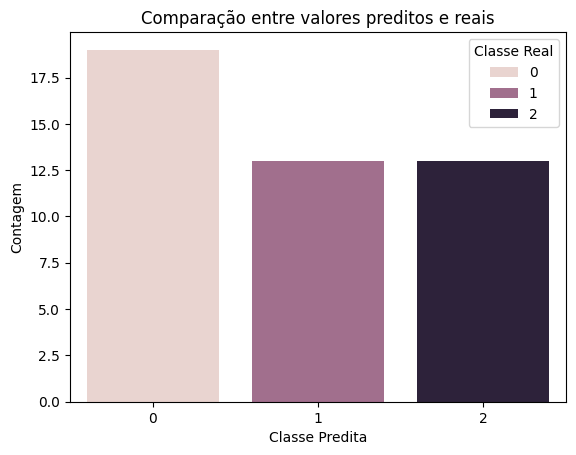

In [8]:
# Visualizando os resultados
print("Resultados do modelo:")
results_df = pd.DataFrame({
    'Predito': y_pred,
    'Real': y_test
})
sns.countplot(data=results_df, x='Predito', hue='Real')
plt.title('Comparação entre valores preditos e reais')
plt.xlabel('Classe Predita')
plt.ylabel('Contagem')
plt.legend(title='Classe Real', loc='upper right')
plt.show()